In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import the csv

df = pd.read_csv('Classified Data', index_col=0)

df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
# try to standardize as much data to a standard scale as possible

from sklearn.preprocessing import StandardScaler

In [4]:
# instantiate the scaler

scaler = StandardScaler()

In [5]:
# fit the df into the scaler, while dropping the target column - this will prep the scaler for the next step

scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# use transform to transform the data into a 'scaled' data set 'by centering and scaling'

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [7]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [8]:
# use the scaled_features variable array to create a feature dataframe

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])   # [:-1] means all columns but the last, which is our target

df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
# train test split

from sklearn.model_selection import train_test_split

In [10]:
# first, set the X and y
X = df_feat
y = df['TARGET CLASS']

# performt the train / test / split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
# import the model and instantiate it

from sklearn.neighbors import KNeighborsClassifier

# set the k= variable
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
# fit the data

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
# predict

pred = knn.predict(X_test)

In [14]:
# import the result matrix reports

from sklearn.metrics import classification_report, confusion_matrix

In [15]:
# print the result reports

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [17]:
# explore different k values using the 'elbow method'

# iterate many k values and output their error rates to choose the best

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  # get the average error rate

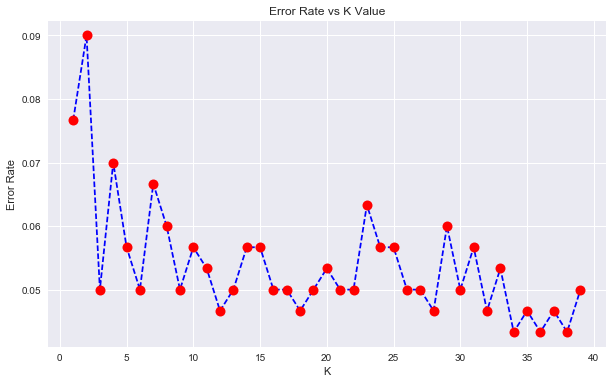

In [19]:
# now let's plot the error results to visualize the performance of each k-value

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
# try a new run of the model choosing a lower error rate k-value from the plot above
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# print the new results to compare with our first run
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[155   4]
 [ 10 131]]


             precision    recall  f1-score   support

          0       0.94      0.97      0.96       159
          1       0.97      0.93      0.95       141

avg / total       0.95      0.95      0.95       300

